### Submission By Abhishek Pandey

### Importing Libraries

In [284]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline


### Read the dataset

In [285]:
df = pd.read_csv('project2-data.csv')
df.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


#### Removing some irrelevant features 

In [286]:
df.drop(['first_name','last_name','email','Loanapp_ID','address','AGT_ID'],axis=1,inplace = True)

In [287]:
df.drop(['Prev_ID','INT_ID'],axis=1,inplace = True)

In [288]:
df

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,F,N,0,Grad,N,3480.0,0.0,71.0,360.0,1.0,Rural,Y
610,M,Y,3+,Grad,N,4927.2,0.0,40.0,180.0,1.0,Rural,Y
611,M,Y,1,Grad,N,9686.4,288.0,253.0,360.0,1.0,Urban,Y
612,M,Y,2,Grad,N,9099.6,0.0,187.0,360.0,1.0,Urban,Y


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    object 
 1   Marital_Status  611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              582 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      612 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      564 non-null    float64
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


Here CPL_Status is our target variable .

In [290]:
df.shape

(614, 12)

### UNIVARIATE ANALYSIS

In [291]:
df['CPL_Status'].unique()

array(['Y', 'N'], dtype=object)

In [292]:
loan_declined = len(df[df['CPL_Status'] == 'N'].index)
loan_approved = len(df[df['CPL_Status']== 'Y'].index)

In [293]:
print("No of Approved Request:",loan_approved)
print("No of Declined Request:",loan_declined)

No of Approved Request: 422
No of Declined Request: 192


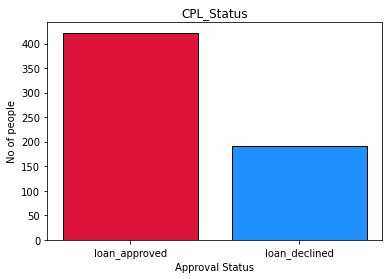

In [294]:
x = ["loan_approved","loan_declined"]
y = [loan_approved,loan_declined]
plt.bar(x, y, color = ["crimson", "dodgerblue"], edgecolor = "black")
plt.title("CPL_Status")
plt.xlabel("Approval Status")
plt.ylabel("No of people")
plt.grid(False)
plt.show()

In [295]:
male = len(df[df['Sex'] == 'M'].index)
female = len(df[df['Sex']== 'F'].index)

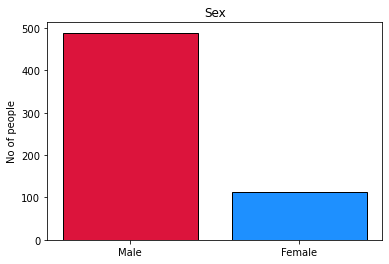

In [296]:
x = ["Male","Female"]
y = [male,female]
plt.bar(x, y, color = ["crimson", "dodgerblue"], edgecolor = "black")
plt.title("Sex")
plt.ylabel("No of people")
plt.grid(False)
plt.show()

In [297]:
SE_yes = len(df[df['SE'] == 'Y'].index)
Se_no = len(df[df['SE']== 'N'].index)

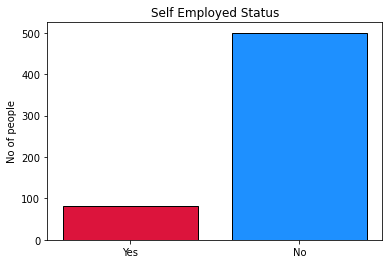

In [298]:
x = ["Yes","No"]
y = [SE_yes,Se_no]
plt.bar(x, y, color = ["crimson", "dodgerblue"], edgecolor = "black")
plt.title("Self Employed Status")
plt.ylabel("No of people")
plt.grid(False)
plt.show()

In [299]:
Not_married = len(df[df['Marital_Status'] == 'N'].index)
Married = len(df[df['Marital_Status']== 'Y'].index)

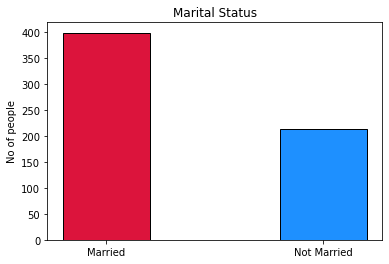

In [300]:
x = ["Married","Not Married"]
y = [Married,Not_married]
plt.bar(x, y,0.4, color = ["crimson", "dodgerblue"], edgecolor = "black")
plt.title("Marital Status")
plt.ylabel("No of people")
plt.grid(False)
plt.show()

In [301]:
Good = len(df[df['Credit_His'] == 1.0].index)
Not_Good = len(df[df['Credit_His']== 0.0].index)

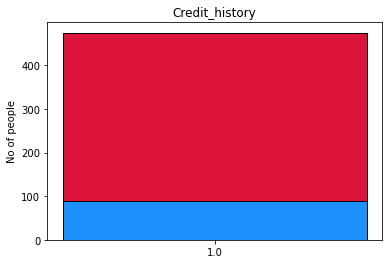

In [302]:
x = ["1.0","1.0"]
y = [Good,Not_Good]
plt.bar(x, y,0.4, color = ["crimson", "dodgerblue"], edgecolor = "black")
plt.title("Credit_history")
plt.ylabel("No of people")
plt.grid(False)
plt.show()

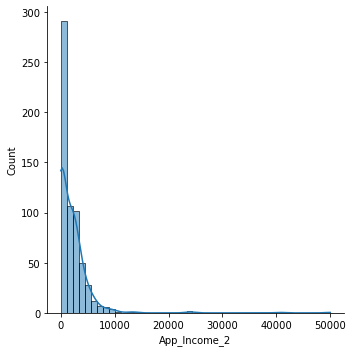

In [303]:
sns.displot(df['App_Income_2'],kde = True,bins = 45)

<AxesSubplot:ylabel='App_Income_2'>

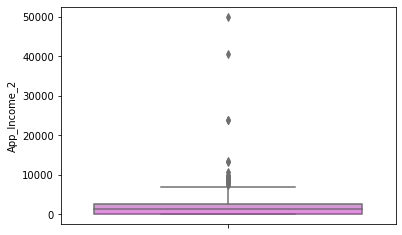

In [304]:
sns.boxplot(y='App_Income_2',data=df,orient ="v",color = 'violet')

{'whiskers': [<matplotlib.lines.Line2D at 0x1eab4598610>,
 'caps': [<matplotlib.lines.Line2D at 0x1eab4598cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eab4598310>],
 'medians': [<matplotlib.lines.Line2D at 0x1eab45a33d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eab45a3730>],
 'means': []}

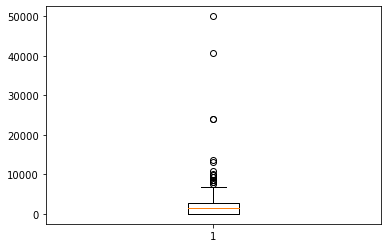

In [305]:
plt.boxplot(df['App_Income_2'],vert=True,patch_artist=False)

### BIVARIATE ANALYSIS WITH BOXPLOT

<AxesSubplot:xlabel='Sex', ylabel='App_Income_2'>

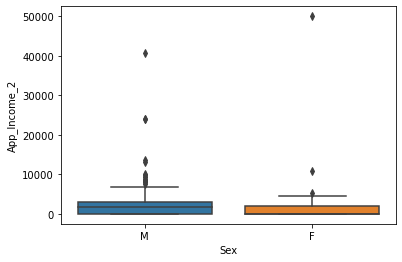

In [306]:
sns.boxplot(x='Sex',y = 'App_Income_2',data=df)

<AxesSubplot:xlabel='Qual_var', ylabel='App_Income_1'>

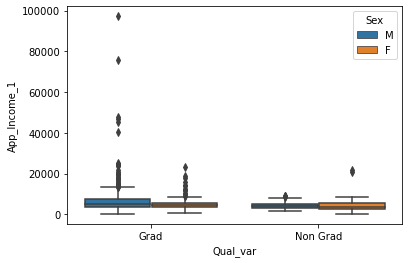

In [307]:
sns.boxplot(x ='Qual_var', y = 'App_Income_1',data=df,hue='Sex')

<AxesSubplot:ylabel='App_Income_1'>

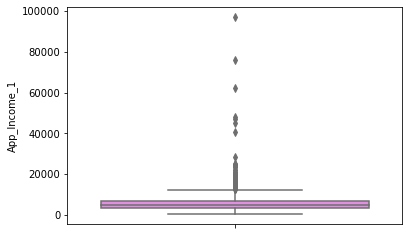

In [308]:
sns.boxplot(y='App_Income_1',data=df,orient ="v",color = 'violet')

<AxesSubplot:title={'center':'Dependents'}, xlabel='Dependents', ylabel='count'>

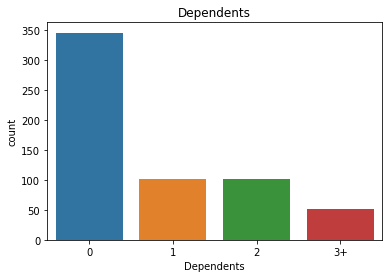

In [309]:
plt.title("Dependents")
sns.countplot(x='Dependents',data=df)

<AxesSubplot:title={'center':'Education'}, xlabel='Qual_var', ylabel='count'>

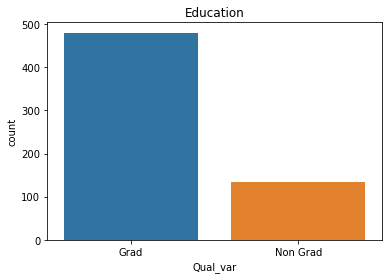

In [310]:
plt.title("Education")
sns.countplot(x='Qual_var',data=df)

<AxesSubplot:title={'center':'Property Area'}, xlabel='Prop_Area', ylabel='count'>

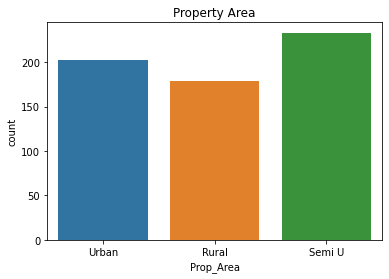

In [311]:
plt.title("Property Area")
sns.countplot(x="Prop_Area",data=df)

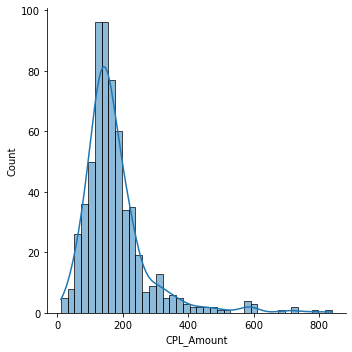

In [312]:
sns.displot(df['CPL_Amount'],kde = True,bins = 40)

<AxesSubplot:ylabel='CPL_Amount'>

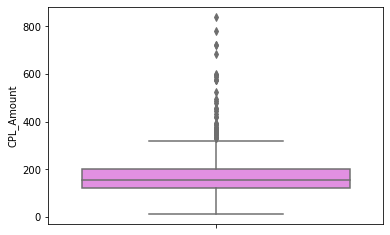

In [313]:
sns.boxplot(y='CPL_Amount',data=df,orient ="v",color = 'violet')

In [314]:
# if df['Marital_Status'] == 'F':
val = df['Marital_Status'].value_counts()

In [315]:
yes_per = val[0]/(val[0]+val[1])
no_per = 1-yes_per
print('Married:',yes_per)
print('Not_Married:',no_per)

Married: 0.6513911620294599
Not_Married: 0.3486088379705401


### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Sex'>

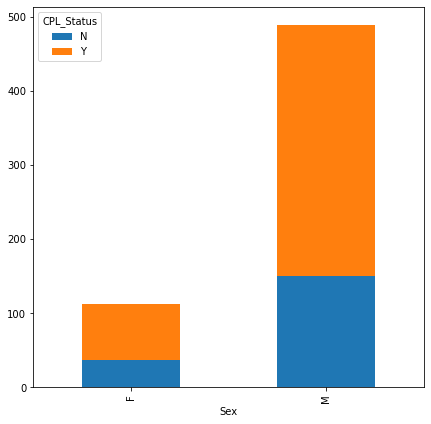

In [316]:
df.groupby(['Sex', 'CPL_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:xlabel='Marital_Status'>

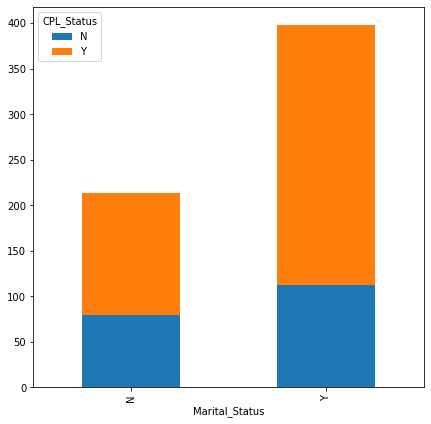

In [317]:
df.groupby(['Marital_Status', 'CPL_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:xlabel='Qual_var'>

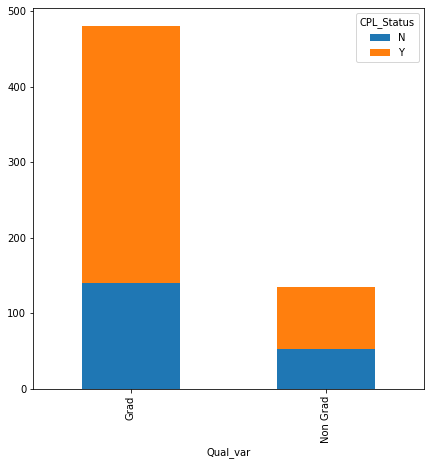

In [318]:
df.groupby(['Qual_var', 'CPL_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:xlabel='SE'>

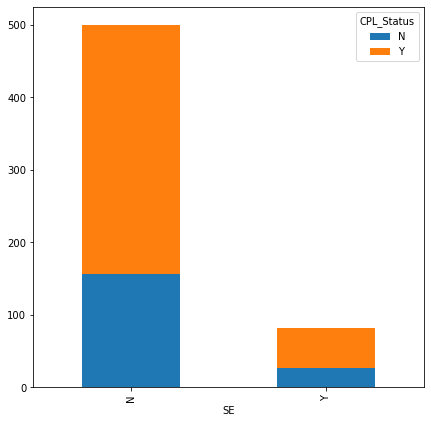

In [319]:
df.groupby(['SE', 'CPL_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:xlabel='Dependents'>

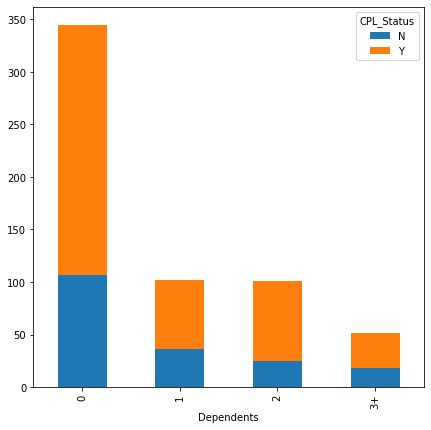

In [320]:
df.groupby(['Dependents', 'CPL_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:xlabel='App_Income_1'>

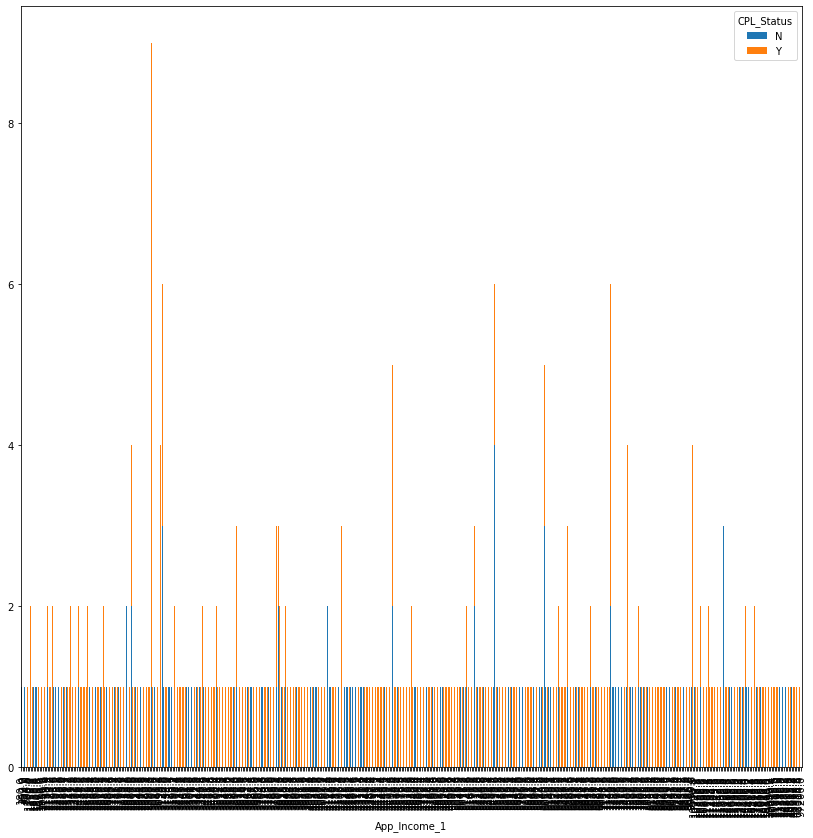

In [321]:
df.groupby(['App_Income_1', 'CPL_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(14, 14))

### DEALING WITH MISSING VALUES

In [322]:
df.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His
count,614.000000,614.000000,612.000000,600.00000,564.000000
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199
std,7330.850008,3511.498043,102.606123,65.12041,0.364878
min,180.000000,0.000000,10.800000,12.00000,0.000000
25%,3453.000000,0.000000,120.000000,360.00000,1.000000
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000
max,97200.000000,50000.400000,840.000000,480.00000,1.000000


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    object 
 1   Marital_Status  611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              582 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      612 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      564 non-null    float64
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [324]:
df.shape

(614, 12)

In [325]:
Mode_of_Sex= df['Sex'].mode()
Mode_of_Sex[0]

'M'

In [326]:
df['Sex'].replace(np.nan,value = Mode_of_Sex[0] ,inplace=True)
df['Marital_Status'].replace(np.nan,value = df['Marital_Status'].mode()[0] ,inplace=True)

In [327]:
Mode_of_credit_his= df['Credit_His'].mode()
df['Credit_His'].replace(np.nan,value = Mode_of_Sex[0] ,inplace=True)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             614 non-null    object 
 1   Marital_Status  614 non-null    object 
 2   Dependents      599 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              582 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      612 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      614 non-null    object 
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [329]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [330]:
df['Dependents'].replace(np.nan,value = df['Dependents'].mode()[0] ,inplace=True)

In [331]:
df['SE'].replace(np.nan,value = df['SE'].mode()[0] ,inplace=True)

In [332]:
df['CPL_Amount'].replace(np.nan,value = df['CPL_Amount'].mean(axis=0) ,inplace=True)

In [333]:
df['CPL_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64

In [334]:
df.corr()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term
App_Income_1,1.000000,-0.116605,0.023082,-0.045306
App_Income_2,-0.116605,1.000000,0.095048,-0.059878
CPL_Amount,0.023082,0.095048,1.000000,-0.006817
CPL_Term,-0.045306,-0.059878,-0.006817,1.000000


<AxesSubplot:>

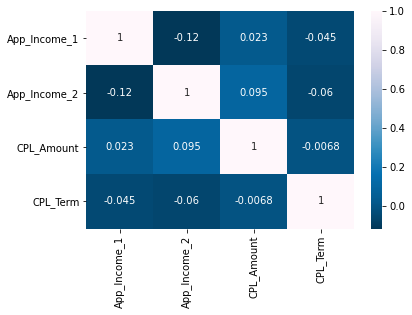

In [335]:
sns.heatmap(df.corr(), annot=True, cmap='PuBu_r')

In [336]:
df["CPL_Term"].dropna(axis = 0,inplace = True)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             614 non-null    object 
 1   Marital_Status  614 non-null    object 
 2   Dependents      614 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              614 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      614 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      614 non-null    object 
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


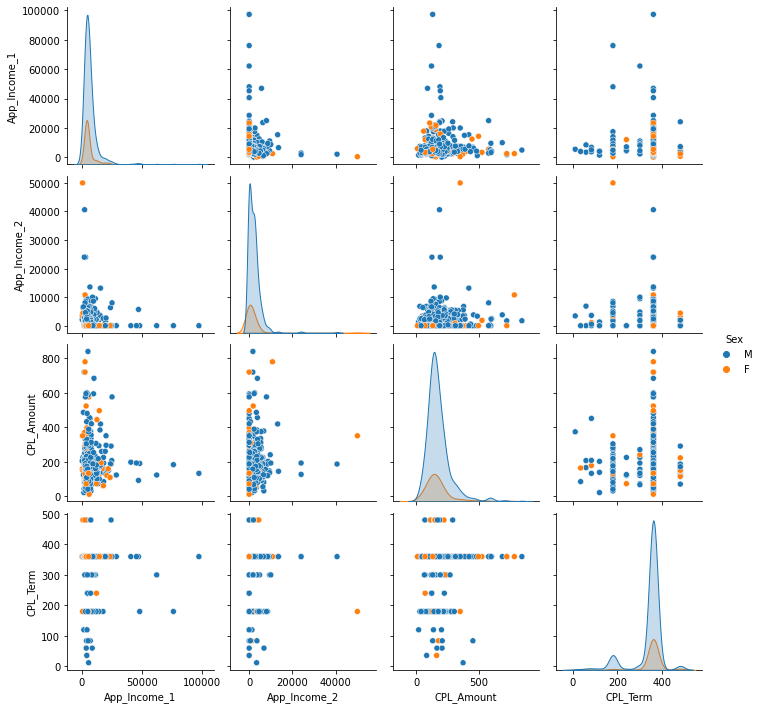

In [338]:
sns.pairplot(df,hue='Sex')

WE CAN SEE THAT THEY ARE NOT CORRELATED 

In [339]:
df.dropna(axis = 0,inplace = True)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             600 non-null    object 
 1   Marital_Status  600 non-null    object 
 2   Dependents      600 non-null    object 
 3   Qual_var        600 non-null    object 
 4   SE              600 non-null    object 
 5   App_Income_1    600 non-null    float64
 6   App_Income_2    600 non-null    float64
 7   CPL_Amount      600 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      600 non-null    object 
 10  Prop_Area       600 non-null    object 
 11  CPL_Status      600 non-null    object 
dtypes: float64(4), object(8)
memory usage: 60.9+ KB


### ONE HOT ENCODING 

In [341]:
sex=pd.get_dummies (df['Sex'])
sex.drop(["F"],axis=1,inplace = True)
sex.rename(columns = {'M': 'Male'},inplace = True)
df1 = pd.concat([df,sex], axis=1)
df1.drop(["Sex"],axis=1,inplace = True)
df1.head()

,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Male
0,N,0,Grad,N,7018.8,0.0,175.805882,360.0,1,Urban,Y,1
1,Y,1,Grad,N,5499.6,1809.6,153.600000,360.0,1,Rural,N,1
2,Y,0,Grad,Y,3600.0,0.0,79.200000,360.0,1,Urban,Y,1
3,Y,0,Non Grad,N,3099.6,2829.6,144.000000,360.0,1,Urban,Y,1
4,N,0,Grad,N,7200.0,0.0,169.200000,360.0,1,Urban,Y,1


In [342]:
Mar_st=pd.get_dummies (df1["Marital_Status"])
Mar_st.drop(["N"],axis=1,inplace = True)
Mar_st.rename(columns = {'Y': 'Married'},inplace = True)
df1 = pd.concat([df1,Mar_st], axis=1)
df1.drop(["Marital_Status"],axis=1,inplace = True)
df1.head()

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Male,Married
0,0,Grad,N,7018.8,0.0,175.805882,360.0,1,Urban,Y,1,0
1,1,Grad,N,5499.6,1809.6,153.600000,360.0,1,Rural,N,1,1
2,0,Grad,Y,3600.0,0.0,79.200000,360.0,1,Urban,Y,1,1
3,0,Non Grad,N,3099.6,2829.6,144.000000,360.0,1,Urban,Y,1,1
4,0,Grad,N,7200.0,0.0,169.200000,360.0,1,Urban,Y,1,0


In [343]:
se =pd.get_dummies (df1["SE"])
se.drop(["N"],axis=1,inplace = True)
se.rename(columns = {'Y': 'Self_emp'},inplace = True)
df1 = pd.concat([df1,se], axis=1)
df1.drop(["SE"],axis=1,inplace = True)
df1.head()

,Dependents,Qual_var,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Male,Married,Self_emp
0,0,Grad,7018.8,0.0,175.805882,360.0,1,Urban,Y,1,0,0
1,1,Grad,5499.6,1809.6,153.600000,360.0,1,Rural,N,1,1,0
2,0,Grad,3600.0,0.0,79.200000,360.0,1,Urban,Y,1,1,1
3,0,Non Grad,3099.6,2829.6,144.000000,360.0,1,Urban,Y,1,1,0
4,0,Grad,7200.0,0.0,169.200000,360.0,1,Urban,Y,1,0,0


In [344]:
QV =pd.get_dummies (df1["Qual_var"])
QV.drop(["Non Grad"],axis=1,inplace = True)
QV.rename(columns = {'Grad': 'Graduate'},inplace = True)
df1 = pd.concat([df1,QV], axis=1)
df1.drop(["Qual_var"],axis=1,inplace = True)
df1.head()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Male,Married,Self_emp,Graduate
0,0,7018.8,0.0,175.805882,360.0,1,Urban,Y,1,0,0,1
1,1,5499.6,1809.6,153.600000,360.0,1,Rural,N,1,1,0,1
2,0,3600.0,0.0,79.200000,360.0,1,Urban,Y,1,1,1,1
3,0,3099.6,2829.6,144.000000,360.0,1,Urban,Y,1,1,0,0
4,0,7200.0,0.0,169.200000,360.0,1,Urban,Y,1,0,0,1


In [345]:
area =pd.get_dummies (df1["Prop_Area"])
area.drop(["Semi U"],axis=1,inplace = True)
df1 = pd.concat([df1,area], axis=1)
df1.drop(["Prop_Area"],axis=1,inplace = True)
df1.head()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,CPL_Status,Male,Married,Self_emp,Graduate,Rural,Urban
0,0,7018.8,0.0,175.805882,360.0,1,Y,1,0,0,1,0,1
1,1,5499.6,1809.6,153.600000,360.0,1,N,1,1,0,1,1,0
2,0,3600.0,0.0,79.200000,360.0,1,Y,1,1,1,1,0,1
3,0,3099.6,2829.6,144.000000,360.0,1,Y,1,1,0,0,0,1
4,0,7200.0,0.0,169.200000,360.0,1,Y,1,0,0,1,0,1


In [346]:
dep =pd.get_dummies (df1["Dependents"])
dep.drop(["0"],axis=1,inplace = True)
dep.rename(columns = {'1': '1_dep','2': '2_dep','3+': '3+_dep'},inplace = True)
df1 = pd.concat([df1,dep], axis=1)
df1.drop(["Dependents"],axis=1,inplace = True)
df1.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,CPL_Status,Male,Married,Self_emp,Graduate,Rural,Urban,1_dep,2_dep,3+_dep
0,7018.8,0.0,175.805882,360.0,1,Y,1,0,0,1,0,1,0,0,0
1,5499.6,1809.6,153.600000,360.0,1,N,1,1,0,1,1,0,1,0,0
2,3600.0,0.0,79.200000,360.0,1,Y,1,1,1,1,0,1,0,0,0
3,3099.6,2829.6,144.000000,360.0,1,Y,1,1,0,0,0,1,0,0,0
4,7200.0,0.0,169.200000,360.0,1,Y,1,0,0,1,0,1,0,0,0


In [347]:
loan =pd.get_dummies (df1["CPL_Status"])
loan.drop(["N"],axis=1,inplace = True)
loan.rename(columns = {'Y': 'Have_loan'},inplace = True)
df1 = pd.concat([df1,loan], axis=1)
df1.drop(["CPL_Status"],axis=1,inplace = True)
df1.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Male,Married,Self_emp,Graduate,Rural,Urban,1_dep,2_dep,3+_dep,Have_loan
0,7018.8,0.0,175.805882,360.0,1,1,0,0,1,0,1,0,0,0,1
1,5499.6,1809.6,153.600000,360.0,1,1,1,0,1,1,0,1,0,0,0
2,3600.0,0.0,79.200000,360.0,1,1,1,1,1,0,1,0,0,0,1
3,3099.6,2829.6,144.000000,360.0,1,1,1,0,0,0,1,0,0,0,1
4,7200.0,0.0,169.200000,360.0,1,1,0,0,1,0,1,0,0,0,1


In [348]:
df1.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Male,Married,Self_emp,Graduate,Rural,Urban,1_dep,2_dep,3+_dep,Have_loan
count,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,6519.772000,1942.409840,176.178020,342.00000,0.818333,0.653333,0.133333,0.786667,0.291667,0.325000,0.168333,0.168333,0.083333,0.690000
std,7405.504985,3540.273267,102.954378,65.12041,0.385891,0.476306,0.340218,0.410003,0.454909,0.468766,0.374474,0.374474,0.276616,0.462879
min,180.000000,0.000000,10.800000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3456.600000,0.000000,120.000000,360.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4576.200000,1378.800000,153.600000,360.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6978.900000,2711.100000,200.700000,360.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [349]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 613
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App_Income_1  600 non-null    float64
 1   App_Income_2  600 non-null    float64
 2   CPL_Amount    600 non-null    float64
 3   CPL_Term      600 non-null    float64
 4   Credit_His    600 non-null    object 
 5   Male          600 non-null    uint8  
 6   Married       600 non-null    uint8  
 7   Self_emp      600 non-null    uint8  
 8   Graduate      600 non-null    uint8  
 9   Rural         600 non-null    uint8  
 10  Urban         600 non-null    uint8  
 11  1_dep         600 non-null    uint8  
 12  2_dep         600 non-null    uint8  
 13  3+_dep        600 non-null    uint8  
 14  Have_loan     600 non-null    uint8  
dtypes: float64(4), object(1), uint8(10)
memory usage: 34.0+ KB


In [350]:
# convert_dict = {'Credit_His': int
#                }
  
# df = df.astype(convert_dict)
# print(df.dtypes)
df['Credit_His'].value_counts()

1.0    467
0.0     83
M       50
Name: Credit_His, dtype: int64

In [351]:
his =pd.get_dummies (df1["Credit_His"])
his.drop([0],axis=1,inplace = True)
his.rename(columns = {1.0: 'cre_his','M':'Many_cre_his'},inplace = True)
df1 = pd.concat([df1,his], axis=1)
df1.drop(["Credit_His"],axis=1,inplace = True)
df1.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Male,Married,Self_emp,Graduate,Rural,Urban,1_dep,2_dep,3+_dep,Have_loan,cre_his,Many_cre_his
0,7018.8,0.0,175.805882,360.0,1,0,0,1,0,1,0,0,0,1,1,0
1,5499.6,1809.6,153.600000,360.0,1,1,0,1,1,0,1,0,0,0,1,0
2,3600.0,0.0,79.200000,360.0,1,1,1,1,0,1,0,0,0,1,1,0
3,3099.6,2829.6,144.000000,360.0,1,1,0,0,0,1,0,0,0,1,1,0
4,7200.0,0.0,169.200000,360.0,1,0,0,1,0,1,0,0,0,1,1,0


### Test Train split

In [352]:
X = df1.iloc[:,:-1] 
y = df1.iloc[:,-1:]

In [353]:
df1

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Male,Married,Self_emp,Graduate,Rural,Urban,1_dep,2_dep,3+_dep,Have_loan,cre_his,Many_cre_his
0,7018.8,0.0,175.805882,360.0,1,0,0,1,0,1,0,0,0,1,1,0
1,5499.6,1809.6,153.600000,360.0,1,1,0,1,1,0,1,0,0,0,1,0
2,3600.0,0.0,79.200000,360.0,1,1,1,1,0,1,0,0,0,1,1,0
3,3099.6,2829.6,144.000000,360.0,1,1,0,0,0,1,0,0,0,1,1,0
4,7200.0,0.0,169.200000,360.0,1,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3480.0,0.0,71.000000,360.0,0,0,0,1,1,0,0,0,0,1,1,0
610,4927.2,0.0,40.000000,180.0,1,1,0,1,1,0,0,0,1,1,1,0
611,9686.4,288.0,253.000000,360.0,1,1,0,1,0,1,1,0,0,1,1,0
612,9099.6,0.0,187.000000,360.0,1,1,0,1,0,1,0,1,0,1,1,0


In [354]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### APPLING MACHINE LEARNING ALGORITMS

#### LOGISTIC REGRESSION

In [356]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [357]:
model.fit(X_train,y_train)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [358]:
y_pred=model.predict(X_test)

In [359]:
# from sklearn.metrics import accuracy_score
# log_acc = accuracy_score(y_test, y_pred)
model.score(X_test,y_test)

0.9166666666666666

In [360]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = LogisticRegression()
scores=cross_val_score(model,X,y,cv=skfold)
log_mean_score = np.mean(scores)
print(scores)
print('Accuracy: %.3f (%.3f)' % (log_mean_score, std(scores)))

[0.9        0.95833333 0.98333333 0.95833333 0.95      ]
Accuracy: 0.950 (0.027)


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

#### Decision Tree

In [361]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [362]:
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model,X,y,cv=skfold)
Dec_tree_score = np.mean(scores)
print(scores)
print('Accuracy: %.3f (%.3f)' % (Dec_tree_score, std(scores)))

[0.975      0.925      0.95833333 0.95833333 0.95      ]
Accuracy: 0.953 (0.016)


#### Support Vector Machine

In [363]:
from sklearn import svm
model = svm.SVC()

In [364]:
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model,X,y,cv=skfold)
svm_score = np.mean(scores)
print(scores)
print('Accuracy: %.3f (%.3f)' % (svm_score, std(n_scores)))

[0.91666667 0.91666667 0.91666667 0.91666667 0.91666667]
Accuracy: 0.917 (0.021)


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

#### Random Forest 

In [365]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [366]:
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model,X,y,cv=skfold)
Random_score = np.mean(scores)
print(scores)
print('Accuracy: %.3f (%.3f)' % (Random_score, std(scores)))

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column

[0.94166667 0.93333333 0.95833333 0.95833333 0.925     ]
Accuracy: 0.943 (0.013)


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


#### KNN 

In [367]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [368]:
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model,X,y,cv=skfold)
KNN_score = np.mean(scores)
print(scores)
print(KNN_score)
print('Accuracy: %.3f (%.3f)' % (KNN_score, std(scores)))

[0.91666667 0.91666667 0.91666667 0.91666667 0.91666667]
0.9166666666666666
Accuracy: 0.917 (0.000)


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

#### XGBOOST 

In [369]:
pip install xgboost==1.0.1

In [370]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std

In [371]:
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(n_scores)
xg_score = mean(n_scores)
print('Accuracy: %.3f (%.3f)' % (xg_score, std(n_scores)))

[0.96666667 0.98333333 0.96666667 0.91666667 0.95       0.93333333
 0.93333333 0.96666667 0.95       1.         0.96666667 0.95
 0.91666667 0.93333333 0.96666667 0.95       0.96666667 0.98333333
 0.95       0.93333333 0.93333333 0.95       0.96666667 0.93333333
 0.91666667 0.95       0.95       0.98333333 0.95       0.96666667]
Accuracy: 0.953 (0.021)


### Comparison Of All Machine Learning Algorithm

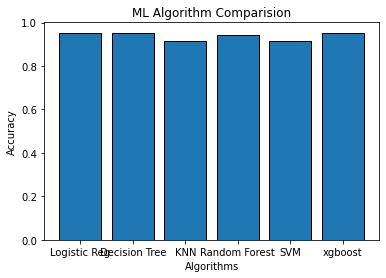

In [372]:
x = ["Logistic Reg", "Decision Tree", "KNN", "Random Forest","SVM","xgboost"]
y = [log_mean_score ,Dec_tree_score ,KNN_score ,Random_score ,svm_score ,xg_score ]
plt.bar(x, y, edgecolor = "black")
plt.title("ML Algorithm Comparision")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

### We can see here that we have got maximum accuracy in "XGBOOST Algorithm"